In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(tf. __version__)

2.16.1


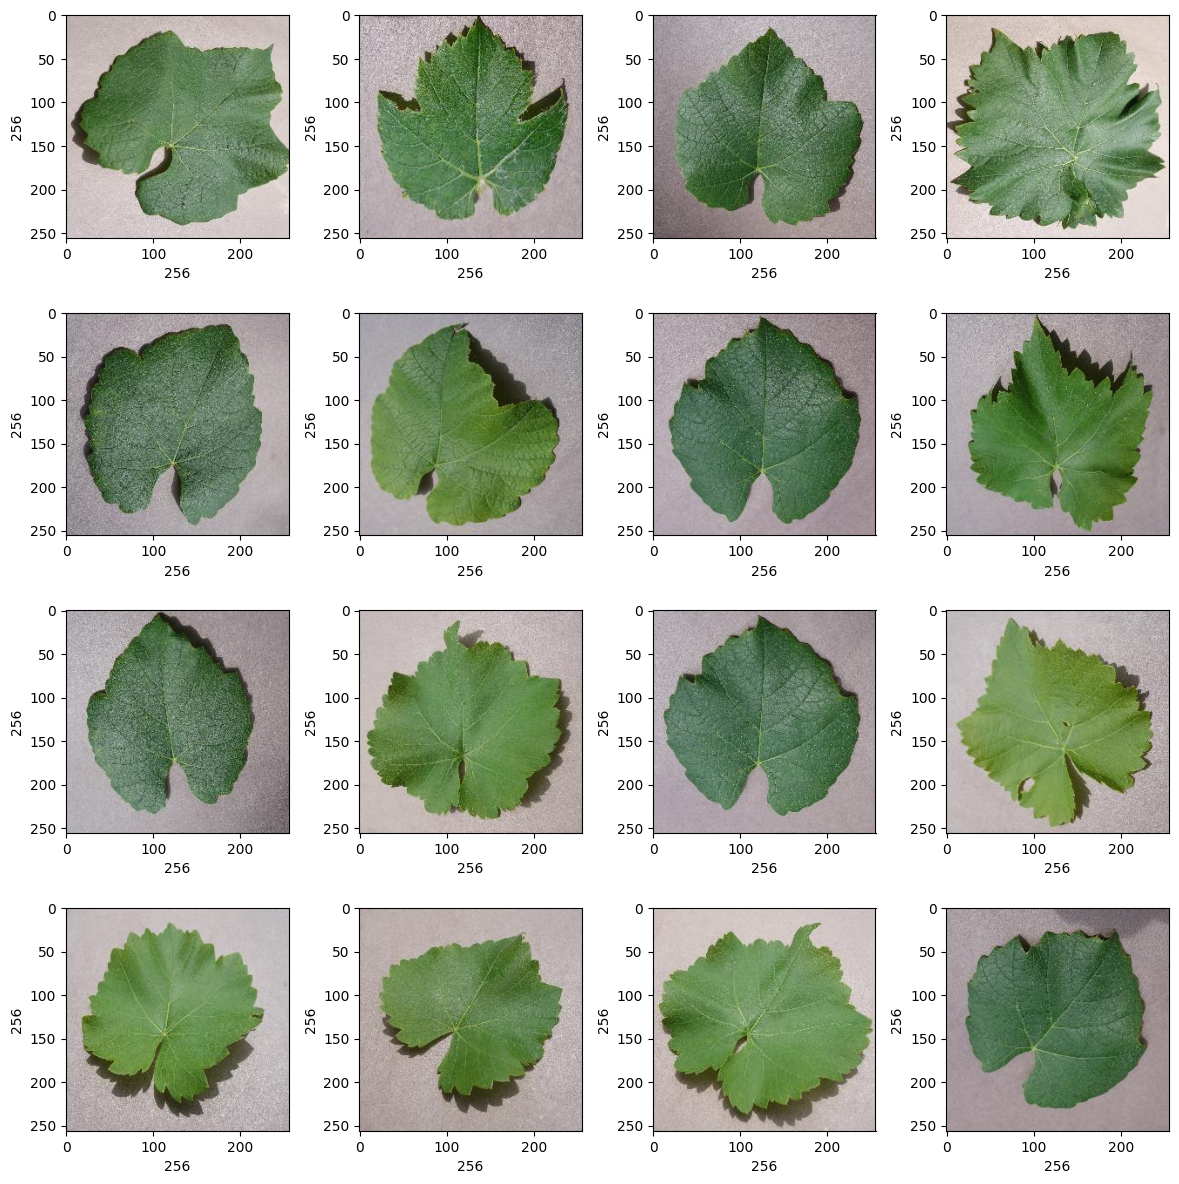

In [4]:
plt.figure(figsize=(12,12))
path="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color/Grape___healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [6]:
dir="C:/Users/PC-ACER/Downloads/archive (2)/plantvillage dataset/color"
image_list,label_list=[],[]
all_labels=['Grape_Black_rot', 'Grape_Esca_(Black_Measles)', 'Grape_healthy']
binary_labels=[0,1,2]
temp=-1

for directory in ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

0
1    1383
0    1180
2     423
Name: count, dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [10]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [11]:
x_train[0].shape

(256, 256, 3)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="categorial_crossentropy",optimizer=Adam(0.0001),metrics=["accuracy"])

In [15]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs=50
batch_size=128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 973ms/step - accuracy: 0.3336 - loss: 1.0657 - val_accuracy: 0.3787 - val_loss: 1.0206
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.4088 - loss: 0.9672 - val_accuracy: 0.3891 - val_loss: 0.9636
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 805ms/step - accuracy: 0.3934 - loss: 0.9434 - val_accuracy: 0.3828 - val_loss: 0.9160
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 829ms/step - accuracy: 0.4185 - loss: 0.8867 - val_accuracy: 0.3787 - val_loss: 0.8943
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 962ms/step - accuracy: 0.3794 - loss: 0.8743 - val_accuracy: 0.3849 - val_loss: 0.8451
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4137 - loss: 0.8330 - val_accuracy: 0.3870 - val_loss: 0.8118
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4434 - loss: 0.7975 - val_accuracy: 0.3912 - val_loss: 0.7914
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4324 - loss: 0.7751 - val_accuracy: 0.5

In [18]:
model.save=("/content/drive/MyDrive/Ethic Project/Model/grape_plant_disease_model.h5")


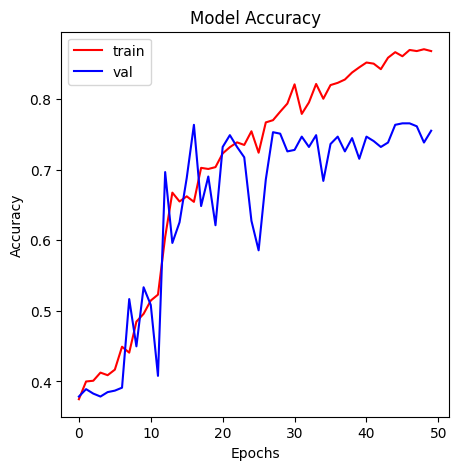

In [19]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],color="r")
plt.plot(history.history["val_accuracy"],color="b")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

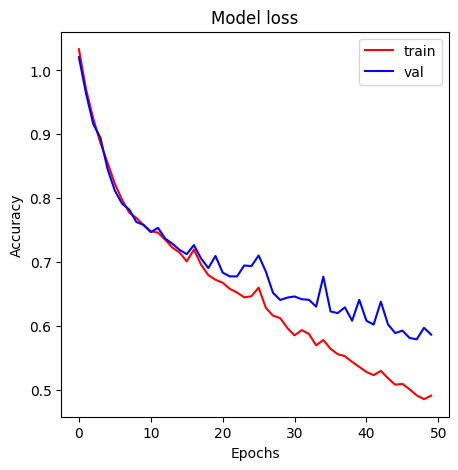

In [20]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],color="r")
plt.plot(history.history["val_loss"],color="b")
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","val"])
plt.show()

In [21]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7478 - loss: 0.5803
Test Accuracy: 76.92307829856873


In [22]:
y_pred=model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


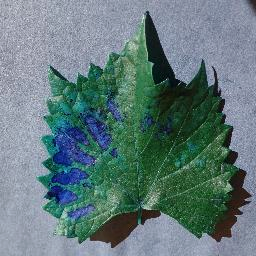

In [ ]:
img=array_to_img(x_test[11])
img


In [24]:
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Grape_Esca_(Black_Measles)
Predicted Label:  Grape_Black_rot
[9.633386e-01 3.666145e-02 5.728601e-15]


In [26]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])],"-",all_labels[np.argmax(y_pred[i])])

Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Esca_(Black_Measles) - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Esca_(Black_Measles) - Grape_healthy
Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Esca_(Black_Measles) - Grape_Black_rot
Grape_Esca_(Black_Measles) - Grape_Esca_(Black_Measles)
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Esca_(Black_Measles) - Grape_healthy
Grape_Esca_(Black_Measles) - Grape_healthy
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Black_rot - Grape_Black_rot
Grape_Esca_(Black_Measles) - Grape_Bl